In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Так как работа с повышением конверсии предполагается постоянная, в т.ч. с визуальным оформлением сайта, 
выбирается система A/B Tasty. И количество пользователей в рамках среднего тарифа.

Гипотеза: Понижение коэффициента surge, чтобы увеличить price-to-order конверсию (во время surge)
Ожидаем: выше price-to-order конверсия во время surge

In [24]:
ds = pd.read_csv('new_dataframe.csv')

In [25]:
ds['price-to-order'] = ds['order_made'] / ds['price_seen']

ds = ds.query('surge == "surge"')

ds['group'] = ds['user_id'].apply(lambda x: 'test' if np.random.rand()<0.5 else 'control')

ds

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm,price-to-order,group
9,9,662775,17,Android,comfort,surge,1,1,1,1,0,1,4.828326,36,low,1.0,control
10,10,464055,20,iOS,comfort,surge,1,1,1,1,0,0,3.647097,25,high,1.0,control
18,18,393096,23,Android,comfort,surge,1,1,0,0,0,1,2.523357,19,high,0.0,control
21,21,103860,13,iOS,economy,surge,1,1,1,1,0,1,7.934002,21,high,1.0,test
24,24,461185,21,iOS,economy,surge,1,1,1,1,0,1,1.590209,29,high,1.0,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101488,101488,811817,7,Android,comfort,surge,1,1,0,0,0,0,4.515511,38,high,0.0,control
101490,101490,780673,20,Android,comfort,surge,1,1,0,0,0,1,5.439498,20,low,0.0,test
101494,101494,203176,17,iOS,economy,surge,1,1,0,0,0,1,5.314341,27,low,0.0,test
101496,101496,627754,2,iOS,comfort,surge,1,1,1,1,0,1,6.206134,23,low,1.0,control


In [26]:
averages = ds.groupby('group')['price-to-order'].mean()

pd.DataFrame(averages)

,price-to-order
group,
control,0.720291
test,0.725438


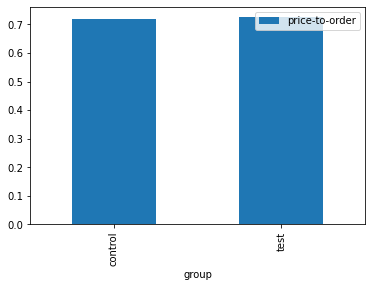

In [28]:
pd.DataFrame(averages).plot.bar();

In [36]:
f"Средняя конверсия price-to-order: {ds['price-to-order'].mean():.2%}"

'Средняя конверсия price-to-order: 72.28%'

На время теста для группы test добаляется изменение на 7 дней или до достижения 40000 пользователей, 
т.к. настолько ограчивает тариф A/B-сервиса. 
(Зная средний поток клиентов с Surge в день, можно было бы просто в днях ограничение поставить)
Судя по калькулятору https://mindbox.ru/ab-test-calculator/ 
это позволит при среднем показателе конверсии 72% выявить прирост от 1,26%.
По окончании теста - проверка статистической значимости различий - 
с проверкой вторичных метрик - не снизились ли средние ride_completed и distance.